# 10.16 Intro to Data Science: Time Series and Simple Linear Regression 

**This file includes the Self Check snippets which continue from the section body.**

### Time Series
### Simple Linear Regression
### Linear Relationships

In [1]:
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [2]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [3]:
import pandas as pd

In [4]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

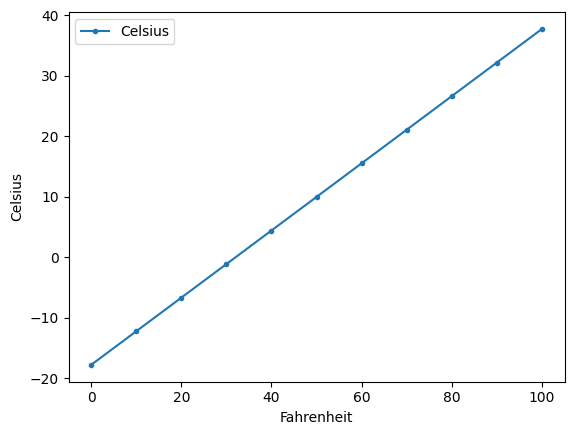

In [5]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

In [6]:
# Extra cell added to keep subsequent snippet numbers the same as the chapter.
# Had to merge the two prior cells for use in the notebook.

### Components of the Simple Linear Regression Equation 
### SciPy’s `stats` Module
### Pandas
### Seaborn Visualization
### Getting Weather Data from NOAA


### Loading the Average High Temperatures into a `DataFrame` 

In [7]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [8]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [9]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Cleaning the Data

In [10]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [11]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [12]:
nyc.Date.dtype

dtype('int64')

In [13]:
nyc.Date = nyc.Date.floordiv(100)

In [14]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Calculating Basic Descriptive Statistics for the Dataset

In [17]:
pd.set_option('display.precision', 2)

In [18]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Forecasting Future January Average High Temperatures

In [19]:
from scipy import stats

In [20]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [21]:
linear_regression.slope

np.float64(0.014771361132966163)

In [22]:
linear_regression.intercept

np.float64(8.694993233674289)

In [23]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [24]:
linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

### Plotting the Average High Temperatures and a Regression Line 

In [25]:
import seaborn as sns

In [26]:
sns.set_style('whitegrid')

(10.0, 70.0)

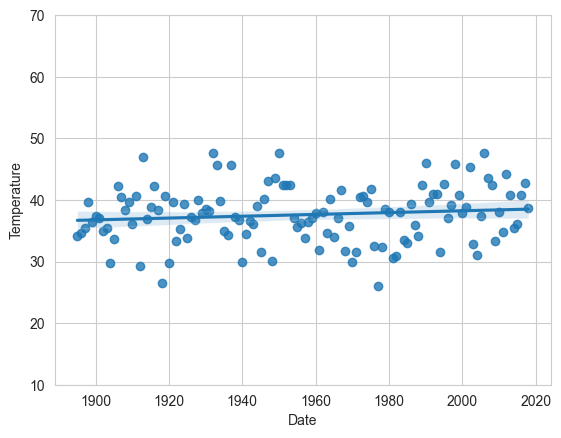

In [27]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

In [28]:
# Extra cell added to keep subsequent snippet numbers the same as the chapter.
# Had to merge the two prior cells for use in the notebook.

### Getting Time Series Datasets

![Self Check Exercises check mark image](files/art/check.png)
# 10.16 Self Check

**1. _(Fill-In)_**  Time series `________` looks at existing time series data for patterns, helping data analysts understand the data. Time series `________` uses data from the past to predict the future. 

**Answer:** analysis, forecasting.

**2. _(True/False)_** In the formula, `c` `=` `5` `/` `9` `*` `(f` `-` `32)`, `f` (the Fahrenheit temperature) is the independent variable and `c` (the Celsius temperature) is the dependent variable.

**Answer:** True. 

**3. _(IPython Session)_** Based on the slope and intercept values calculated in this section’s interactive session, in what year might the average January temperature in New York City reach 40 degrees Fahrenheit.

**Answer:** 

In [29]:
year = 2019

In [30]:
slope = linear_regression.slope

In [31]:
intercept = linear_regression.intercept

In [32]:
temperature = slope * year + intercept

In [33]:
while temperature < 40.0:
    year += 1
    temperature = slope * year + intercept

In [34]:
year

2120

In [35]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################
